# Music DH Final Project Demo Plotly EDAs

In [4]:
# libraries
import numpy as np
import pandas as pd

# plotting
import matplotlib.pyplot as plt
import ipywidgets
import seaborn as sns
import plotly

In [24]:
# now import the data: 
data = pd.read_csv('music.csv')

In [25]:
data.head()

,artist.familiarity,artist.hotttnesss,artist.id,artist.latitude,artist.location,artist.longitude,artist.name,artist.similar,artist.terms,artist.terms_freq,...,song.mode,song.mode_confidence,song.start_of_fade_out,song.tatums_confidence,song.tatums_start,song.tempo,song.time_signature,song.time_signature_confidence,song.title,song.year
0,0.581794,0.401998,ARD7TVE1187B99BFB1,0.00000,0,0.00000,Casual,0.0,hip hop,1.000000,...,0,0.636,218.932,0.779,0.28519,92.198,4.0,0.778,0,0
1,0.630630,0.417500,ARMJAGH1187FB546F3,35.14968,0,-90.04892,The Box Tops,0.0,blue-eyed soul,1.000000,...,0,0.430,137.915,0.969,0.20627,121.274,4.0,0.384,0,1969
2,0.487357,0.343428,ARKRRTF1187B9984DA,0.00000,0,0.00000,Sonora Santanera,0.0,salsa,1.000000,...,1,0.565,172.304,0.482,0.42132,100.070,1.0,0.000,0,0
3,0.630382,0.454231,AR7G5I41187FB4CE6C,0.00000,0,0.00000,Adam Ant,0.0,pop rock,0.988584,...,1,0.749,217.124,0.601,0.56254,119.293,4.0,0.000,0,1982
4,0.651046,0.401724,ARXR32B1187FB57099,0.00000,0,0.00000,Gob,0.0,pop punk,0.887288,...,1,0.371,198.699,1.000,0.13576,129.738,4.0,0.562,0,2007


In [26]:
# cleaning functions: 

def remove_years(data, label):
    '''remove the data points where there is no data on year'''
    return data[data[label] !=0]

def remove_empty_columns(data):
    '''remove a row if the sum of the row is zero''' 
    for c in data.columns:
        if np.sum(data[c]) == 0:
            data.drop(c, axis = 1)
    return data 

def add_simplified_genres(data):
    '''adds a column called simplfied_genre to your music data
    simplified genre defined as the last word to appear in the full genre title'''
    data['simplified_genre'] = (data['artist.terms'] # calls the complete genre column 
            .dropna() # drops rows without a genre 
            .str.split() # splits the string in each row by white space 
            .apply(lambda s: s[-1])) # assigns the value to be the last word in the string per row 
    return data 
    
def clean_data(data):
    data = (data.pipe(remove_years, 'song.year')
            .pipe(remove_empty_columns)
            .pipe(add_simplified_genres))
    return data


In [27]:
data.columns

Index(['artist.familiarity', 'artist.hotttnesss', 'artist.id',
       'artist.latitude', 'artist.location', 'artist.longitude', 'artist.name',
       'artist.similar', 'artist.terms', 'artist.terms_freq', 'release.id',
       'release.name', 'song.artist_mbtags', 'song.artist_mbtags_count',
       'song.bars_confidence', 'song.bars_start', 'song.beats_confidence',
       'song.beats_start', 'song.duration', 'song.end_of_fade_in',
       'song.hotttnesss', 'song.id', 'song.key', 'song.key_confidence',
       'song.loudness', 'song.mode', 'song.mode_confidence',
       'song.start_of_fade_out', 'song.tatums_confidence', 'song.tatums_start',
       'song.tempo', 'song.time_signature', 'song.time_signature_confidence',
       'song.title', 'song.year'],
      dtype='object')

In [28]:
# cleaning time 

data = clean_data(data)

data.head()

C:\Users\alica\AppData\Local\Temp\ipykernel_32912\4030251764.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['simplified_genre'] = (data['artist.terms'] # calls the complete genre column


,artist.familiarity,artist.hotttnesss,artist.id,artist.latitude,artist.location,artist.longitude,artist.name,artist.similar,artist.terms,artist.terms_freq,...,song.mode_confidence,song.start_of_fade_out,song.tatums_confidence,song.tatums_start,song.tempo,song.time_signature,song.time_signature_confidence,song.title,song.year,simplified_genre
1,0.630630,0.417500,ARMJAGH1187FB546F3,35.14968,0,-90.04892,The Box Tops,0.0,blue-eyed soul,1.000000,...,0.430,137.915,0.969,0.20627,121.274,4.0,0.384,0,1969,soul
3,0.630382,0.454231,AR7G5I41187FB4CE6C,0.00000,0,0.00000,Adam Ant,0.0,pop rock,0.988584,...,0.749,217.124,0.601,0.56254,119.293,4.0,0.000,0,1982,rock
4,0.651046,0.401724,ARXR32B1187FB57099,0.00000,0,0.00000,Gob,0.0,pop punk,0.887288,...,0.371,198.699,1.000,0.13576,129.738,4.0,0.562,0,2007,punk
8,0.426668,0.332276,AR8ZCNI1187B9A069B,0.00000,0,0.00000,Planet P Project,0.0,new wave,0.959766,...,0.652,258.990,0.121,1.22595,86.643,4.0,0.487,0,1984,wave
14,0.776676,0.553072,ARIK43K1187B9AE54C,0.00000,0,0.00000,Lionel Richie,0.0,quiet storm,1.000000,...,0.533,296.658,0.389,0.58901,125.197,3.0,0.211,0,1986,storm


## Using Plotly

I want to create a visualization where you can toggle through 

In [29]:
import plotly.express as px

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4680 entries, 1 to 9999
Data columns (total 36 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   artist.familiarity              4680 non-null   float64
 1   artist.hotttnesss               4680 non-null   float64
 2   artist.id                       4680 non-null   object 
 3   artist.latitude                 4680 non-null   float64
 4   artist.location                 4680 non-null   int64  
 5   artist.longitude                4680 non-null   float64
 6   artist.name                     4680 non-null   object 
 7   artist.similar                  4680 non-null   float64
 8   artist.terms                    4680 non-null   object 
 9   artist.terms_freq               4680 non-null   float64
 10  release.id                      4680 non-null   int64  
 11  release.name                    4680 non-null   int64  
 12  song.artist_mbtags              46

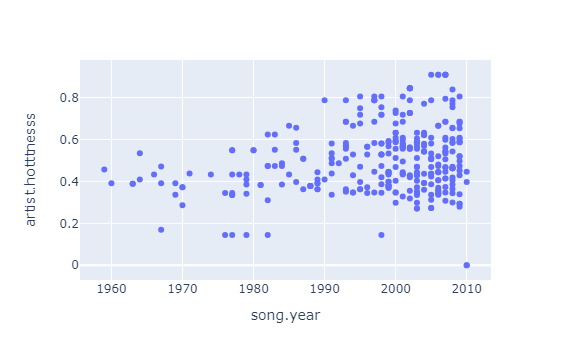

In [36]:
# let's see how pop changes over time?

(px.scatter
 (data[data['simplified_genre'] == 'pop'], 
  y = 'artist.hotttnesss', 
  x = 'song.year'))

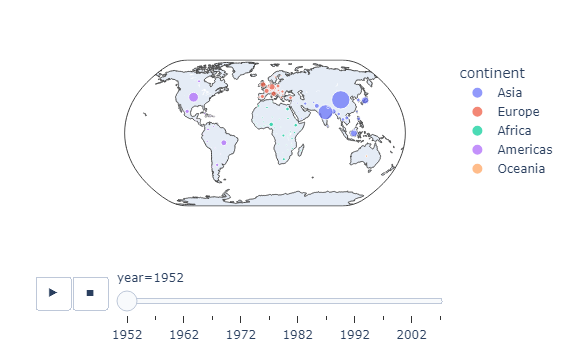

In [37]:
# trying to use the map to get an idea of locations:

df = px.data.gapminder()
fig = px.scatter_geo(df, locations="iso_alpha", color="continent",
                     hover_name="country", size="pop",
                     animation_frame="year",
                     projection="natural earth")
fig.show()

In [40]:
data.head()

,artist.familiarity,artist.hotttnesss,artist.id,artist.latitude,artist.location,artist.longitude,artist.name,artist.similar,artist.terms,artist.terms_freq,...,song.mode_confidence,song.start_of_fade_out,song.tatums_confidence,song.tatums_start,song.tempo,song.time_signature,song.time_signature_confidence,song.title,song.year,simplified_genre
1,0.630630,0.417500,ARMJAGH1187FB546F3,35.14968,0,-90.04892,The Box Tops,0.0,blue-eyed soul,1.000000,...,0.430,137.915,0.969,0.20627,121.274,4.0,0.384,0,1969,soul
3,0.630382,0.454231,AR7G5I41187FB4CE6C,0.00000,0,0.00000,Adam Ant,0.0,pop rock,0.988584,...,0.749,217.124,0.601,0.56254,119.293,4.0,0.000,0,1982,rock
4,0.651046,0.401724,ARXR32B1187FB57099,0.00000,0,0.00000,Gob,0.0,pop punk,0.887288,...,0.371,198.699,1.000,0.13576,129.738,4.0,0.562,0,2007,punk
8,0.426668,0.332276,AR8ZCNI1187B9A069B,0.00000,0,0.00000,Planet P Project,0.0,new wave,0.959766,...,0.652,258.990,0.121,1.22595,86.643,4.0,0.487,0,1984,wave
14,0.776676,0.553072,ARIK43K1187B9AE54C,0.00000,0,0.00000,Lionel Richie,0.0,quiet storm,1.000000,...,0.533,296.658,0.389,0.58901,125.197,3.0,0.211,0,1986,storm


In [43]:
# now let's try on our data: 
# first let's get rid of data points without location markers

def no_loc(data):
    '''removes data points without longitudes and or lattitudes'''
    filtered = (data['artist.latitude'] != 0) & (data['artist.longitude'] != 0)
    return data[filtered]

In [46]:
no_loc(data).head()

,artist.familiarity,artist.hotttnesss,artist.id,artist.latitude,artist.location,artist.longitude,artist.name,artist.similar,artist.terms,artist.terms_freq,...,song.mode_confidence,song.start_of_fade_out,song.tatums_confidence,song.tatums_start,song.tempo,song.time_signature,song.time_signature_confidence,song.title,song.year,simplified_genre
1,0.630630,0.417500,ARMJAGH1187FB546F3,35.14968,0,-90.04892,The Box Tops,0.0,blue-eyed soul,1.000000,...,0.430,137.915,0.969,0.20627,121.274,4.0,0.384,0,1969,soul
15,0.636424,0.447935,ARD842G1187B997376,43.64856,0,-79.38533,Blue Rodeo,0.0,country rock,1.000000,...,0.829,486.034,0.377,0.05047,119.826,4.0,0.756,0,1987,rock
23,0.839963,0.541889,ARMAC4T1187FB3FA4C,40.82624,0,-74.47995,The Dillinger Escape Plan,0.0,math-core,0.944381,...,0.453,204.696,0.654,0.15349,166.862,4.0,0.000,0,2004,math-core
24,0.435416,0.306242,AR47JEX1187B995D81,37.83721,0,-94.35868,SUE THOMPSON,0.0,pop rock,0.979853,...,0.541,115.740,1.000,0.04025,137.522,4.0,0.000,0,1985,rock
27,0.459797,0.349913,ARDNS031187B9924F0,32.67828,0,-83.22295,Tim Wilson,0.0,filk,1.000000,...,0.539,175.467,0.231,0.07391,90.022,1.0,0.971,0,2005,filk


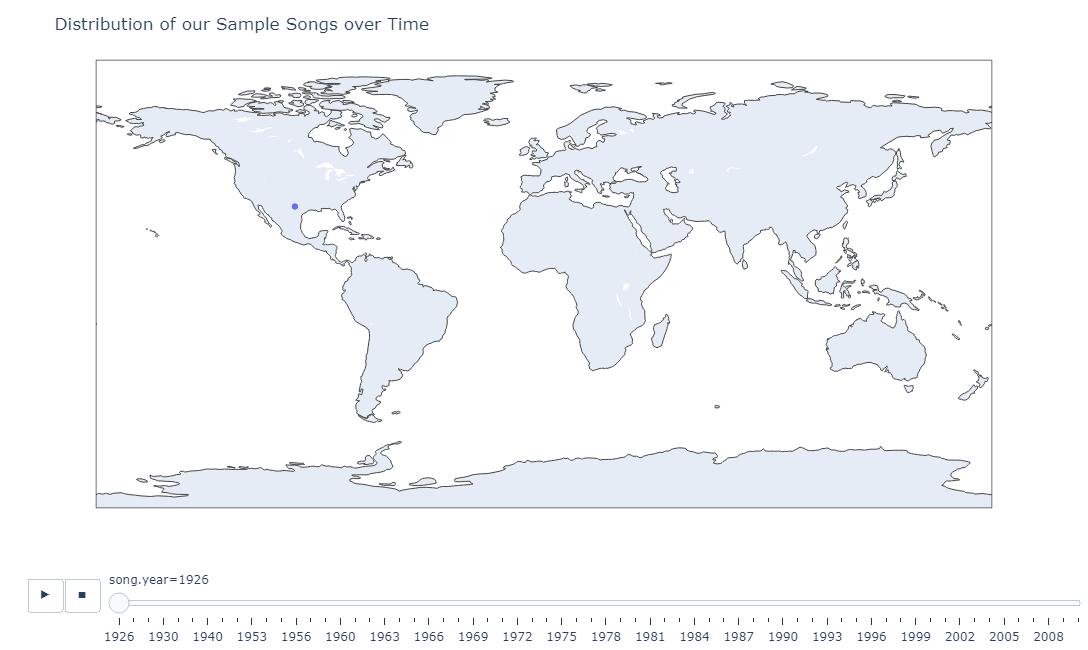

In [124]:
# now lets plot! 

fig = (px.scatter_geo(data_frame = no_loc(data).sort_values('song.year', ascending = True), 
                lat = 'artist.latitude', 
                lon = 'artist.longitude',
                animation_frame = 'song.year',
                hover_name = 'simplified_genre')
)

# fig.update_layout(title = 'Distribution of our Sample Songs over Time',
                  # margin=dict(l=0, r=0, b=0, t=0),
                  # width=1000, 
                  # height=600)
            
fig.update_layout(title = 'Distribution of our Sample Songs over Time')

fig.update_layout(margin = dict(l = 0, r=0, b = 0),
                 width = 900, height = 650)

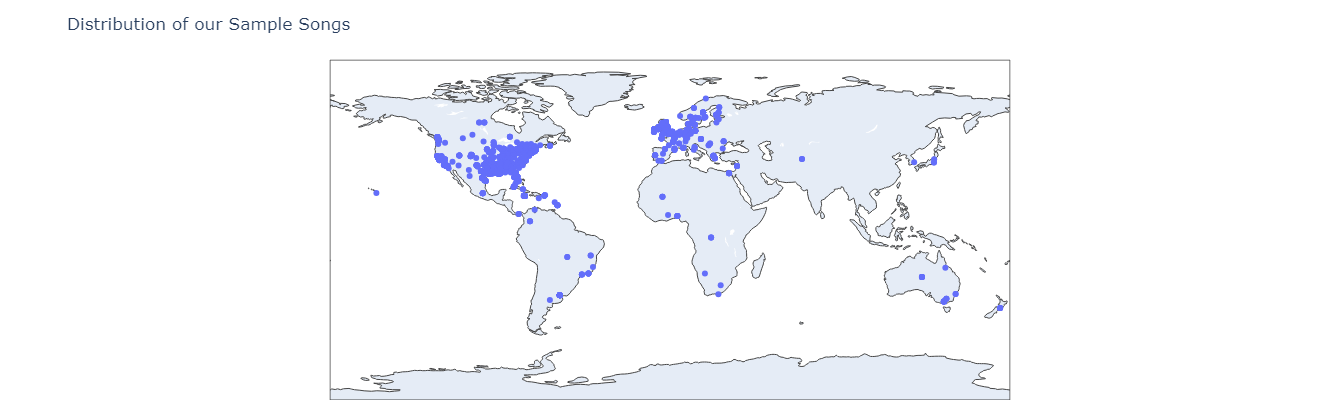

In [100]:
# now without time so I can ss this: 

fig = (px.scatter_geo(data_frame = no_loc(data).sort_values('song.year', ascending = True), 
                lat = 'artist.latitude', 
                lon = 'artist.longitude',
                hover_name = 'simplified_genre')
)

fig.update_layout(title = 'Distribution of our Sample Songs')

fig.update_layout(margin = dict(l = 0, r=0, b = 0),
                 width = 800, height = 400)

In [114]:
# let's make a data table of plots per year: 

data_temp = pd.read_csv('music.csv')

# only keep years with n or more songs 
n = 20
data.groupby('song.year').filter(lambda s: len(s) >= n)

,artist.familiarity,artist.hotttnesss,artist.id,artist.latitude,artist.location,artist.longitude,artist.name,artist.similar,artist.terms,artist.terms_freq,...,song.mode_confidence,song.start_of_fade_out,song.tatums_confidence,song.tatums_start,song.tempo,song.time_signature,song.time_signature_confidence,song.title,song.year,simplified_genre
3,0.630382,0.454231,AR7G5I41187FB4CE6C,0.00000,0,0.00000,Adam Ant,0.0,pop rock,0.988584,...,0.749,217.124,0.601,0.56254,119.293,4.0,0.000,0,1982,rock
4,0.651046,0.401724,ARXR32B1187FB57099,0.00000,0,0.00000,Gob,0.0,pop punk,0.887288,...,0.371,198.699,1.000,0.13576,129.738,4.0,0.562,0,2007,punk
8,0.426668,0.332276,AR8ZCNI1187B9A069B,0.00000,0,0.00000,Planet P Project,0.0,new wave,0.959766,...,0.652,258.990,0.121,1.22595,86.643,4.0,0.487,0,1984,wave
14,0.776676,0.553072,ARIK43K1187B9AE54C,0.00000,0,0.00000,Lionel Richie,0.0,quiet storm,1.000000,...,0.533,296.658,0.389,0.58901,125.197,3.0,0.211,0,1986,storm
15,0.636424,0.447935,ARD842G1187B997376,43.64856,0,-79.38533,Blue Rodeo,0.0,country rock,1.000000,...,0.829,486.034,0.377,0.05047,119.826,4.0,0.756,0,1987,rock
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9991,0.639396,0.430942,ARI4S0E1187B9B06C0,35.83073,0,-85.97874,David Arkenstone,0.0,celtic,0.992986,...,0.648,296.153,0.147,1.63812,141.975,4.0,0.659,0,1996,celtic
9994,0.607327,0.401145,ARDK0551187FB5AC48,31.30627,0,-96.89774,Blind Willie Johnson,0.0,texas blues,0.972353,...,0.200,167.184,0.509,0.14462,95.677,1.0,0.000,0,1989,blues
9995,0.722571,0.499826,AR4C6V01187FB3BAF4,39.55792,0,-7.84481,Moonspell,0.0,sympho black metal,0.999765,...,0.540,386.194,0.224,0.22262,140.185,4.0,0.099,0,1998,metal
9996,0.511663,0.409779,AR9JLBU1187B9AAEC4,-33.96243,0,25.62326,Danny Williams,0.0,ballad,0.915417,...,0.398,163.463,0.604,0.07692,77.072,3.0,0.597,0,1998,ballad


In [118]:
# let's group by decades: 

def add_decade(data):
    '''adds a column named song.decade that tells you the decade of the song'''
    data['song.decade'] = data['song.year'] //10 * 10
    return data

In [120]:
add_decade(data).head()

,artist.familiarity,artist.hotttnesss,artist.id,artist.latitude,artist.location,artist.longitude,artist.name,artist.similar,artist.terms,artist.terms_freq,...,song.start_of_fade_out,song.tatums_confidence,song.tatums_start,song.tempo,song.time_signature,song.time_signature_confidence,song.title,song.year,simplified_genre,song.decade
1,0.630630,0.417500,ARMJAGH1187FB546F3,35.14968,0,-90.04892,The Box Tops,0.0,blue-eyed soul,1.000000,...,137.915,0.969,0.20627,121.274,4.0,0.384,0,1969,soul,1960
3,0.630382,0.454231,AR7G5I41187FB4CE6C,0.00000,0,0.00000,Adam Ant,0.0,pop rock,0.988584,...,217.124,0.601,0.56254,119.293,4.0,0.000,0,1982,rock,1980
4,0.651046,0.401724,ARXR32B1187FB57099,0.00000,0,0.00000,Gob,0.0,pop punk,0.887288,...,198.699,1.000,0.13576,129.738,4.0,0.562,0,2007,punk,2000
8,0.426668,0.332276,AR8ZCNI1187B9A069B,0.00000,0,0.00000,Planet P Project,0.0,new wave,0.959766,...,258.990,0.121,1.22595,86.643,4.0,0.487,0,1984,wave,1980
14,0.776676,0.553072,ARIK43K1187B9AE54C,0.00000,0,0.00000,Lionel Richie,0.0,quiet storm,1.000000,...,296.658,0.389,0.58901,125.197,3.0,0.211,0,1986,storm,1980


In [122]:
no_loc(add_decade(data))

,artist.familiarity,artist.hotttnesss,artist.id,artist.latitude,artist.location,artist.longitude,artist.name,artist.similar,artist.terms,artist.terms_freq,...,song.start_of_fade_out,song.tatums_confidence,song.tatums_start,song.tempo,song.time_signature,song.time_signature_confidence,song.title,song.year,simplified_genre,song.decade
1,0.630630,0.417500,ARMJAGH1187FB546F3,35.14968,0,-90.04892,The Box Tops,0.0,blue-eyed soul,1.000000,...,137.915,0.969,0.20627,121.274,4.0,0.384,0,1969,soul,1960
15,0.636424,0.447935,ARD842G1187B997376,43.64856,0,-79.38533,Blue Rodeo,0.0,country rock,1.000000,...,486.034,0.377,0.05047,119.826,4.0,0.756,0,1987,rock,1980
23,0.839963,0.541889,ARMAC4T1187FB3FA4C,40.82624,0,-74.47995,The Dillinger Escape Plan,0.0,math-core,0.944381,...,204.696,0.654,0.15349,166.862,4.0,0.000,0,2004,math-core,2000
24,0.435416,0.306242,AR47JEX1187B995D81,37.83721,0,-94.35868,SUE THOMPSON,0.0,pop rock,0.979853,...,115.740,1.000,0.04025,137.522,4.0,0.000,0,1985,rock,1980
27,0.459797,0.349913,ARDNS031187B9924F0,32.67828,0,-83.22295,Tim Wilson,0.0,filk,1.000000,...,175.467,0.231,0.07391,90.022,1.0,0.971,0,2005,filk,2000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9988,0.582035,0.469056,AR0ILWV1187FB47CAA,39.75911,0,-84.19444,Mouth Of The Architect,0.0,doom metal,0.995406,...,455.593,0.265,0.31592,124.562,3.0,0.989,0,2006,metal,2000
9991,0.639396,0.430942,ARI4S0E1187B9B06C0,35.83073,0,-85.97874,David Arkenstone,0.0,celtic,0.992986,...,296.153,0.147,1.63812,141.975,4.0,0.659,0,1996,celtic,1990
9994,0.607327,0.401145,ARDK0551187FB5AC48,31.30627,0,-96.89774,Blind Willie Johnson,0.0,texas blues,0.972353,...,167.184,0.509,0.14462,95.677,1.0,0.000,0,1989,blues,1980
9995,0.722571,0.499826,AR4C6V01187FB3BAF4,39.55792,0,-7.84481,Moonspell,0.0,sympho black metal,0.999765,...,386.194,0.224,0.22262,140.185,4.0,0.099,0,1998,metal,1990


In [123]:
no_loc(data_temp)

,artist.familiarity,artist.hotttnesss,artist.id,artist.latitude,artist.location,artist.longitude,artist.name,artist.similar,artist.terms,artist.terms_freq,...,song.mode,song.mode_confidence,song.start_of_fade_out,song.tatums_confidence,song.tatums_start,song.tempo,song.time_signature,song.time_signature_confidence,song.title,song.year
1,0.630630,0.417500,ARMJAGH1187FB546F3,35.14968,0,-90.04892,The Box Tops,0.0,blue-eyed soul,1.000000,...,0,0.430,137.915,0.969,0.20627,121.274,4.0,0.384,0,1969
10,0.360031,0.296269,ARGSJW91187B9B1D6B,35.21962,0,-80.01955,JennyAnyKind,0.0,alternative rock,0.956081,...,0,0.485,207.012,0.229,0.11194,146.765,1.0,0.000,0,0
15,0.636424,0.447935,ARD842G1187B997376,43.64856,0,-79.38533,Blue Rodeo,0.0,country rock,1.000000,...,1,0.829,486.034,0.377,0.05047,119.826,4.0,0.756,0,1987
16,0.419943,0.330806,ARIG6O41187B988BDD,37.16793,0,-95.84502,Richard Souther,0.0,chill-out,0.830058,...,1,0.516,217.426,0.767,0.08584,127.756,5.0,0.579,0,0
20,0.394139,0.291540,ARQGYP71187FB44566,34.31109,0,-94.02978,Jimmy Wakely,0.0,classic country,1.000000,...,1,0.716,146.199,0.617,0.12236,86.186,3.0,0.929,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9991,0.639396,0.430942,ARI4S0E1187B9B06C0,35.83073,0,-85.97874,David Arkenstone,0.0,celtic,0.992986,...,1,0.648,296.153,0.147,1.63812,141.975,4.0,0.659,0,1996
9993,0.450646,0.331535,ARQ91R31187FB38A88,37.82245,0,-85.69091,Grandpa Jones,0.0,bluegrass,1.000000,...,1,0.394,136.615,0.965,0.05143,119.271,4.0,0.150,0,0
9994,0.607327,0.401145,ARDK0551187FB5AC48,31.30627,0,-96.89774,Blind Willie Johnson,0.0,texas blues,0.972353,...,1,0.200,167.184,0.509,0.14462,95.677,1.0,0.000,0,1989
9995,0.722571,0.499826,AR4C6V01187FB3BAF4,39.55792,0,-7.84481,Moonspell,0.0,sympho black metal,0.999765,...,1,0.540,386.194,0.224,0.22262,140.185,4.0,0.099,0,1998


In [125]:
# okay maybe we need to investigate genre more? see where they all end up ? is there some connections?

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4680 entries, 1 to 9999
Data columns (total 37 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   artist.familiarity              4680 non-null   float64
 1   artist.hotttnesss               4680 non-null   float64
 2   artist.id                       4680 non-null   object 
 3   artist.latitude                 4680 non-null   float64
 4   artist.location                 4680 non-null   int64  
 5   artist.longitude                4680 non-null   float64
 6   artist.name                     4680 non-null   object 
 7   artist.similar                  4680 non-null   float64
 8   artist.terms                    4680 non-null   object 
 9   artist.terms_freq               4680 non-null   float64
 10  release.id                      4680 non-null   int64  
 11  release.name                    4680 non-null   int64  
 12  song.artist_mbtags              46

Id like to investigate how genres plot against eachother either in 2d or 3d, so let's first see how genre looks when using certain characteristics:

like 

song.loudness

song.tempo

song.duration

song.mode (discrete)


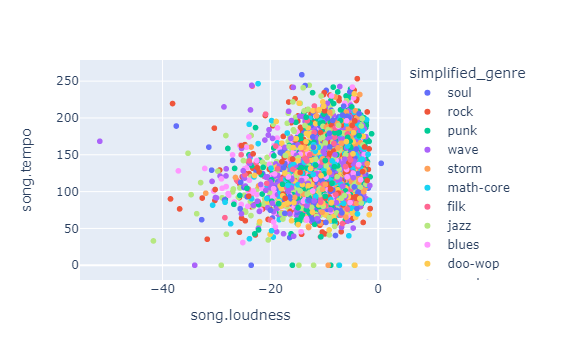

In [129]:
# so let's test!

px.scatter(data_frame = data, x = 'song.loudness', y= 'song.tempo', hover_name = 'artist.terms', color = 'simplified_genre')


In [130]:
# looks like we've got some overplotting so let's take the log of loudness and see what that looks like:

In [133]:
def log_loudness(data):
    '''returns the log of the loudness for our music data'''
    data['log_song.loudness'] = np.log(-1 * data['song.loudness'])
    return data

C:\Users\alica\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning:

invalid value encountered in log



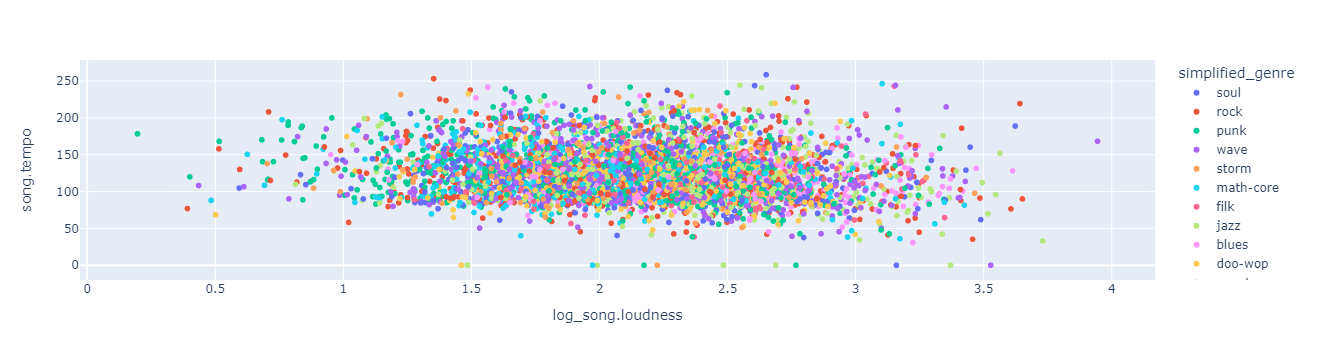

In [135]:
log_loudness(data)

px.scatter(data_frame = log_loudness(data), x = 'log_song.loudness', y= 'song.tempo', hover_name = 'artist.terms', color = 'simplified_genre')

In [142]:
# okay now we can see there doesn't seem to be a sufficient correlations between loudness and tempo over all genres, but what about only the most popular genres?


def more_than_n_songs(data, n = 10):
    '''only keeps genres that have more than N songs in the entire data set
    default set to 10'''
    data = data.groupby('artist.terms').filter(lambda x: len(x) >= 50)
    return data


In [144]:
more_than_n_songs(data).head()

,artist.familiarity,artist.hotttnesss,artist.id,artist.latitude,artist.location,artist.longitude,artist.name,artist.similar,artist.terms,artist.terms_freq,...,song.tatums_confidence,song.tatums_start,song.tempo,song.time_signature,song.time_signature_confidence,song.title,song.year,simplified_genre,song.decade,log_song.loudness
3,0.630382,0.454231,AR7G5I41187FB4CE6C,0.00000,0,0.00000,Adam Ant,0.0,pop rock,0.988584,...,0.601,0.56254,119.293,4.0,0.000,0,1982,rock,1980,2.198668
15,0.636424,0.447935,ARD842G1187B997376,43.64856,0,-79.38533,Blue Rodeo,0.0,country rock,1.000000,...,0.377,0.05047,119.826,4.0,0.756,0,1987,rock,1980,2.148968
24,0.435416,0.306242,AR47JEX1187B995D81,37.83721,0,-94.35868,SUE THOMPSON,0.0,pop rock,0.979853,...,1.000,0.04025,137.522,4.0,0.000,0,1985,rock,1980,2.512198
28,0.588827,0.379671,AROUOZZ1187B9ABE51,40.79195,0,-73.94512,Willie Bobo,0.0,latin jazz,0.965406,...,0.959,0.06314,127.025,4.0,0.792,0,1997,jazz,1990,2.263428
52,0.569741,0.412241,AROEL1B1187B988B90,0.00000,0,0.00000,Lost Boyz,0.0,gangster rap,1.000000,...,0.466,0.34237,90.218,4.0,1.000,0,1997,rap,1990,2.401797


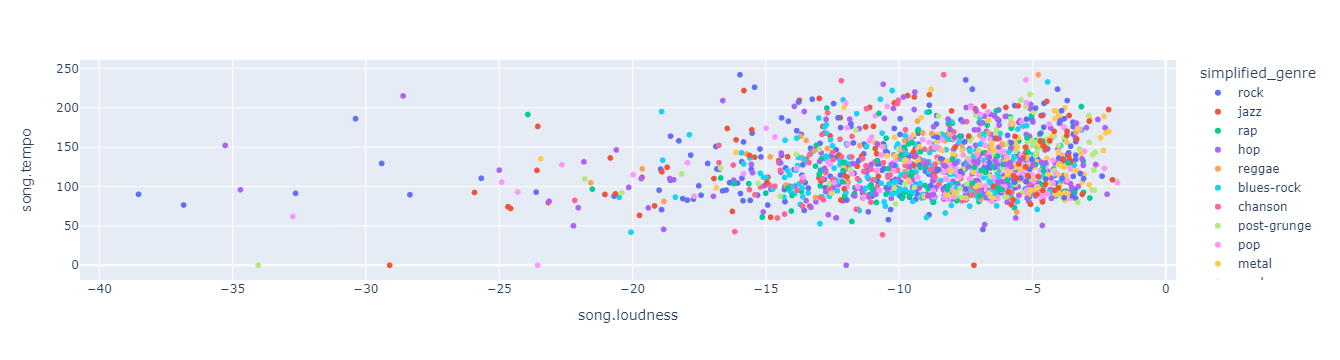

In [150]:
px.scatter(data_frame = more_than_n_songs(data, 10), x = 'song.loudness', y= 'song.tempo', hover_name = 'artist.terms', color = 'simplified_genre')

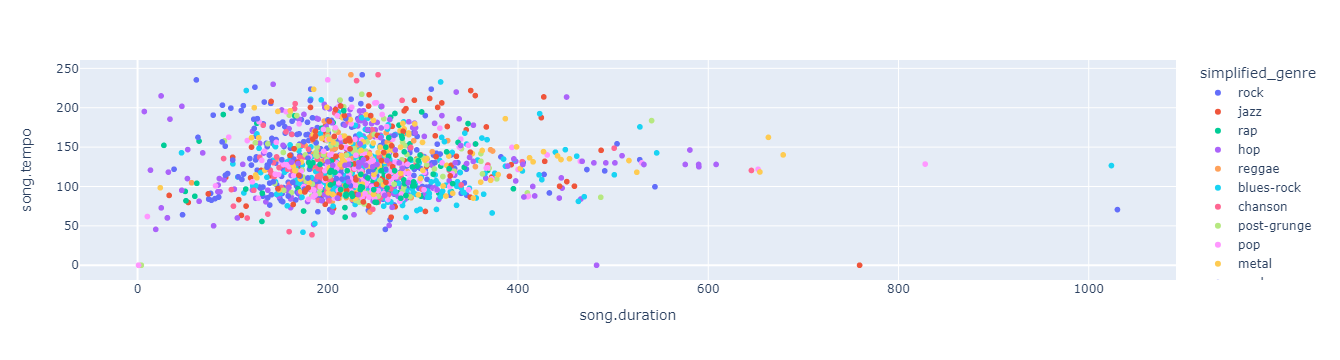

In [151]:
# let's try other parameters then:

px.scatter(data_frame = more_than_n_songs(data, 10), x = 'song.duration', y= 'song.tempo', hover_name = 'artist.terms', color = 'simplified_genre')

In [153]:
# let's log duration now 

def log_duration(data):
    data['log_duration'] = np.log(data['song.duration'])
    return data

log_duration(data).head()

,artist.familiarity,artist.hotttnesss,artist.id,artist.latitude,artist.location,artist.longitude,artist.name,artist.similar,artist.terms,artist.terms_freq,...,song.tatums_start,song.tempo,song.time_signature,song.time_signature_confidence,song.title,song.year,simplified_genre,song.decade,log_song.loudness,log_duration
1,0.630630,0.417500,ARMJAGH1187FB546F3,35.14968,0,-90.04892,The Box Tops,0.0,blue-eyed soul,1.000000,...,0.20627,121.274,4.0,0.384,0,1969,soul,1960,2.286761,4.997452
3,0.630382,0.454231,AR7G5I41187FB4CE6C,0.00000,0,0.00000,Adam Ant,0.0,pop rock,0.988584,...,0.56254,119.293,4.0,0.000,0,1982,rock,1980,2.198668,5.452769
4,0.651046,0.401724,ARXR32B1187FB57099,0.00000,0,0.00000,Gob,0.0,pop punk,0.887288,...,0.13576,129.738,4.0,0.562,0,2007,punk,2000,1.504300,5.345230
8,0.426668,0.332276,AR8ZCNI1187B9A069B,0.00000,0,0.00000,Planet P Project,0.0,new wave,0.959766,...,1.22595,86.643,4.0,0.487,0,1984,wave,1980,2.602393,5.597749
14,0.776676,0.553072,ARIK43K1187B9AE54C,0.00000,0,0.00000,Lionel Richie,0.0,quiet storm,1.000000,...,0.58901,125.197,3.0,0.211,0,1986,storm,1980,2.121782,5.728093


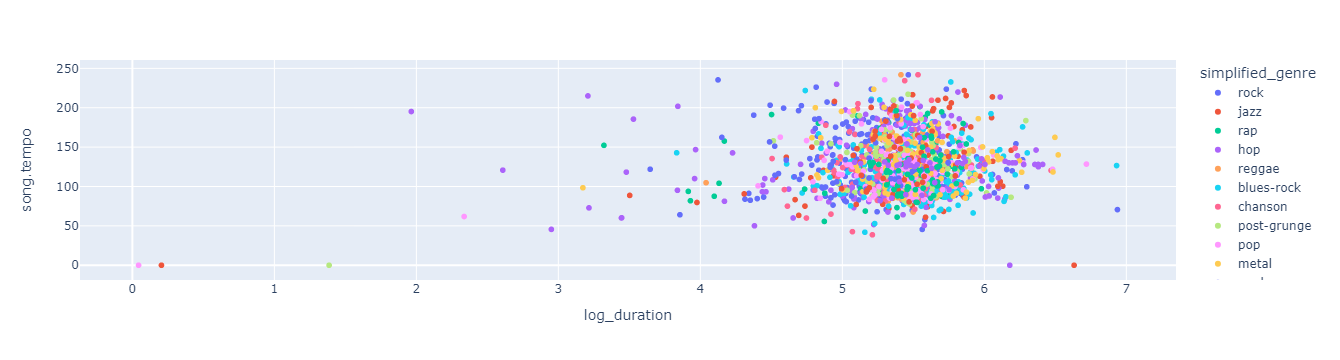

In [156]:
px.scatter(data_frame = log_duration(more_than_n_songs(data, 3)), x = 'log_duration', y= 'song.tempo', hover_name = 'artist.terms', color = 'simplified_genre')